##  REPORT OF DIABETIC PATIENTS 

In [1884]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [1885]:
#loading the dataset
df = pd.read_csv('diabetics.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



PERFORMING ALL STATISTICAL ANALYSIS : CENTRAL TENDANCY ,SKEWNESS, AND KURTOSIS.


In [1886]:
#finding mode for gender 
mode = df['Outcome'].mode().values[0] 
print(f"Most frequent outcome : {mode}")

Most frequent outcome : 0


In [1887]:
# skewness of the numericals of dataset
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [1888]:
# kurtosis of the numericals of  dataset
df.kurtosis()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

In [1889]:
#statistical analysis of dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




NORMALIZING DATA FOR BETTER VISUALIZATION:


In [1890]:
df = df.select_dtypes(include=['float64', 'int64'])

# Normalize the data 
scaler = MinMaxScaler()
normalized = scaler.fit_transform(df)
normalized = pd.DataFrame(normalized, columns=numeric.columns)
print("Normalized Data:")
print(normalized)
backscaled = scaler.inverse_transform(normalized)
df = pd.DataFrame(backscaled, columns=numeric.columns)

#print data
print("Data:")
print(df)

Normalized Data:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeF

DISTRIBUTION OF BODY MASS INDEX :


In [1891]:
def plot_hist_clustering(df):
    """
    Plots a histogram of the frequencies of BMI with clustering and a linear regression fit.
    """

    # Calculate central tendancy
    median = df['BMI'].median()

    # Reshape BMI data for clustering
    BMI_value = df['BMI'].values.reshape(-1, 1)

    # CLUSTERING : Perform KMeans clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(BMI_value)

    # Adds the cluster labels as a new column in the DataFrame
    df['Cluster'] = clusters

    # Ploting histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(
        df['BMI'], 
        bins=20, 
        kde=True, 
        label='BMI Distribution', 
        color='skyblue'
    )

    # displays cluster centers
    for i, centroid in enumerate(kmeans.cluster_centers_):
        plt.axvline(
            centroid[0], 
            color=f'C{i}', 
            linestyle='--', 
            linewidth=2, 
            label=f'Cluster {i+1} Centre : {centroid[0]:.2f}'
        )


    # Add titles and labels
    plt.title('Distribution of Body Mass Index with Clustering')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')
    plt.axvline(median, color='purple', linestyle='-', label=f'Median: {median:.2f}')
    print(f"Median Plasma Glucose: {median:.2f}")
    plt.legend()
    plt.savefig("histogramCC.png", dpi=400)
    plt.show()
 

Median Plasma Glucose: 32.00


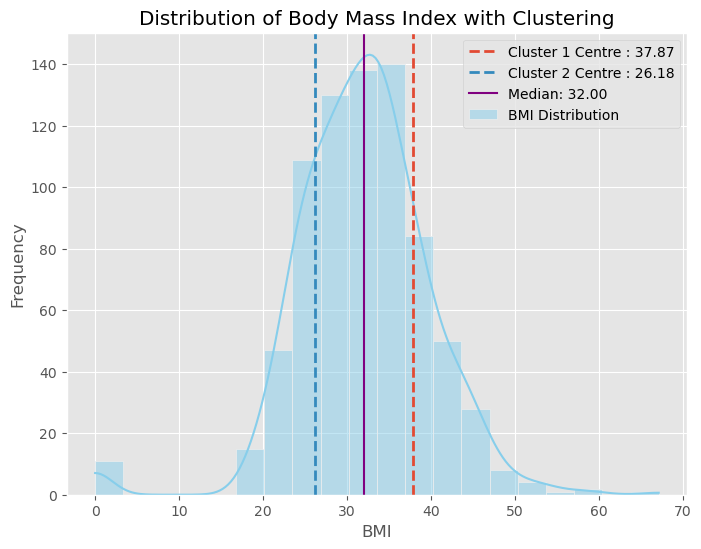

In [1892]:
plot_hist_clustering(df)

In [1893]:
def plot_hist_fitting(df):
    """
    Plots a histogram of the frequencies of BMI with clustering and a linear regression fit.
    """
    # FITTING : linear regression fitting 
    BMI_bins = np.histogram_bin_edges(df['BMI'], bins=20)
    frequency, bin_edges = np.histogram(df['BMI'], bins=BMI_bins)
    midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2  # Midpoints of bins
    X_fit = midpoints.reshape(-1, 1)
    y_fit = frequency
    regressor = LinearRegression()
    regressor.fit(X_fit, y_fit)

    # Predicted values for the regression line
    y_pred = regressor.predict(X_fit)

    # Ploting histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(
        df['BMI'], 
        bins=20, 
        kde=True, 
        label='BMI Distribution', 
        color='skyblue'
    )

    
    # displays linear regression fit
    plt.plot(
        midpoints, 
        y_pred, 
        color='red', 
        linewidth=2, 
        label='Linear Regression Fit'
    )

    # Add titles and labels
    plt.title('Distribution of Body Mass Index with Fitting')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig("histogramFF.png", dpi=400)
    plt.show()
 

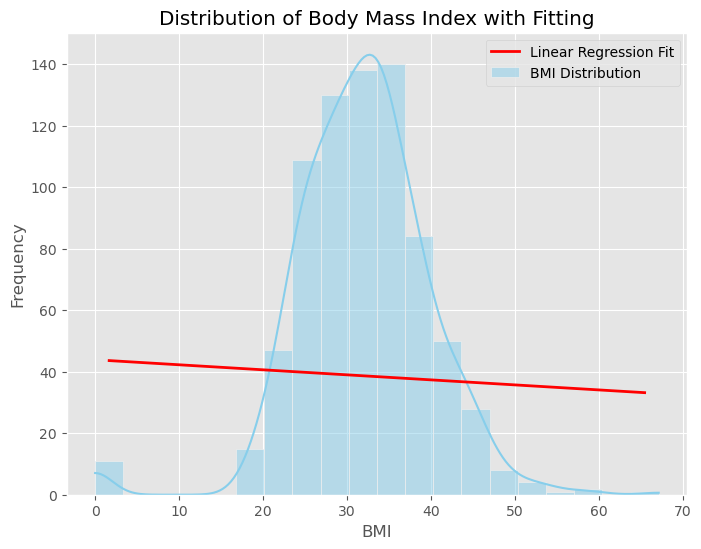

In [1894]:
plot_hist_fitting(df)

RELATIONSHIP BETWEEN AGE AND BLOOD PRESSURE :

In [1895]:
# Scatter plot for Age vs BP with clustering and fitting

def plot_scatter_clustering(data):
    """
    Creates a scatter plot based on blood pressure  with respect to thier age, 
    also includes clustering  functions.
    """
    # plotting scatter
    plt.figure(figsize=(6, 6))
    sns.scatterplot(
        data= df,
        x='Age', 
        y='BloodPressure', 
        hue='Outcome',
        palette=['pink', 'darkblue'], 
        alpha=0.9
    )
    
    plt.title('Scatter Plot of Age vs BloodPressure')
    plt.xlabel('Age')
    plt.ylabel('BloodPressure')
    plt.legend(title='Outcome', loc='upper left')

    # Clustering : using K-Means
    X = data[['Age', 'BloodPressure']].dropna().values 
    kmeans = KMeans(n_clusters=3, random_state=32)
    data['Cluster'] = kmeans.fit_predict(X)
    
    # Overlay cluster centers
    centers = kmeans.cluster_centers_
    plt.scatter(
        centers[:, 0], 
        centers[:, 1], 
        s=100, 
        c='black', 
        marker='X', 
        label='Cluster Centers'
    )
    plt.legend()
    plt.savefig("scatterC.png", dpi=400)
    plt.show()
    

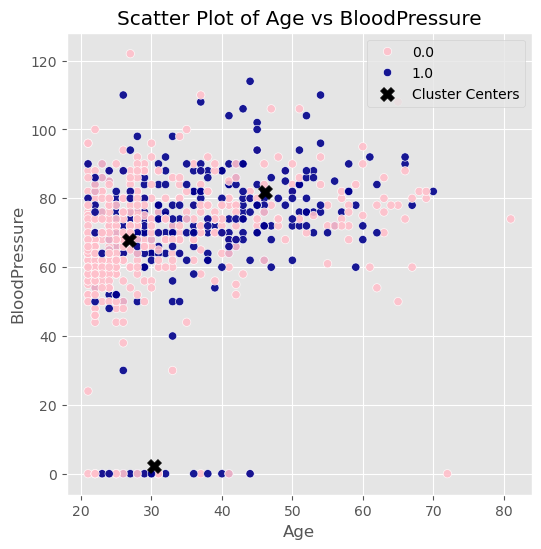

In [1896]:
plot_scatter_clustering(df)

In [1897]:


def plot_scatter_fitting(data):
    """
    Creates a scatter plot based on blood pressure  with respect to thier age, 
    also includes fitting functions.
    """
    # plotting scatter
    plt.figure(figsize=(6, 6))
    sns.scatterplot(
        data= df,
        x='Age', 
        y='BloodPressure', 
        hue='Outcome',
        palette=['pink', 'darkblue'], 
        alpha=0.9
    )
    
    plt.title('Scatter Plot of Age vs BloodPressure')
    plt.xlabel('Age')
    plt.ylabel('BloodPressure')
    plt.legend(title='Outcome', loc='upper left')


    # Fitting : Linear Regression 
    model = LinearRegression()
    X_fit = data['Age'].values.reshape(-1, 1)
    y_fit = data['BloodPressure'].values
    model.fit(X_fit, y_fit)

    # Predicted values for the regression line
    y_pred = model.predict(X_fit)

    # Plots regression line
    plt.plot(data['Age'], y_pred, color='red', linewidth=2, label='Regression Line')
    plt.legend()
    plt.savefig("scatterF.png", dpi=400)
    plt.show()

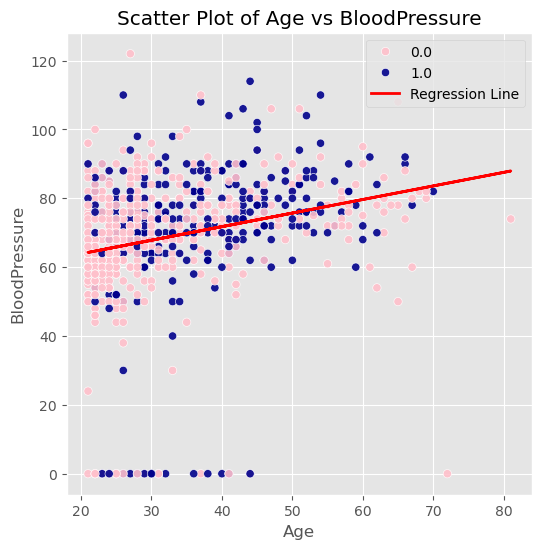

In [1898]:
plot_scatter_fitting(df)

In [1899]:
# Correlation heatmap for numeric features with clustering and fitting
def plot_correlation_heatmap(df):
    """
    Plots a correlation heatmap of dataset and includes clustering and fitting functions.
    """
    # Correlation heatmap
    plt.figure(figsize=(8, 6))
    columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap ')
    plt.savefig("corr.jpg", dpi=400)
    plt.show()

    # Clustering
    X = df[['Pregnancies', 'DiabetesPedigreeFunction']].dropna().values
    kmeans = KMeans(n_clusters=2, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X)

    # shows cluster centers
    centers = kmeans.cluster_centers_
    plt.figure(figsize=(6, 6))
    plt.scatter(
        X[:, 0],
        X[:, 1], 
        c=df['Cluster'], 
        cmap='coolwarm', 
        alpha=0.8, 
        label='Clusters'
    )
    plt.scatter(
        centers[:, 0], 
        centers[:, 1],
        s=100, 
        c='black',
        marker='X',
        label='Cluster Centers'
    )
    plt.xlabel('Pregnancies')
    plt.ylabel('DiabetesPedigreeFunction')
    plt.title('K-Means Clustering on Pregnancies vs DiabetesPedigreeFunction')
    plt.legend()
    plt.savefig("corrC.png", dpi=400)
    plt.show()

    # Linear Regression Fitting
    model = LinearRegression()
    X_fit = df['Pregnancies'].values.reshape(-1, 1)
    y_fit = df['DiabetesPedigreeFunction'].values
    model.fit(X_fit, y_fit)
    y_pred = model.predict(X_fit)

    # Scatter plot with regression line
    plt.figure(figsize=(6, 6))
    plt.scatter(
        df['Pregnancies'], df['DiabetesPedigreeFunction'], alpha=0.8, label='Data Points',color='skyblue'
    )
    plt.plot(
        df['Pregnancies'], y_pred, color='red', linewidth=2, label='Regression Line'
    )
    plt.xlabel('Pregnancies')
    plt.ylabel('DiabetesPedigreeFunction')
    plt.title('Regression Fit: Pregnancies vs DiabetesPedigreeFunction')
    plt.legend()
    plt.savefig("corrF.png", dpi=400)
    plt.show()


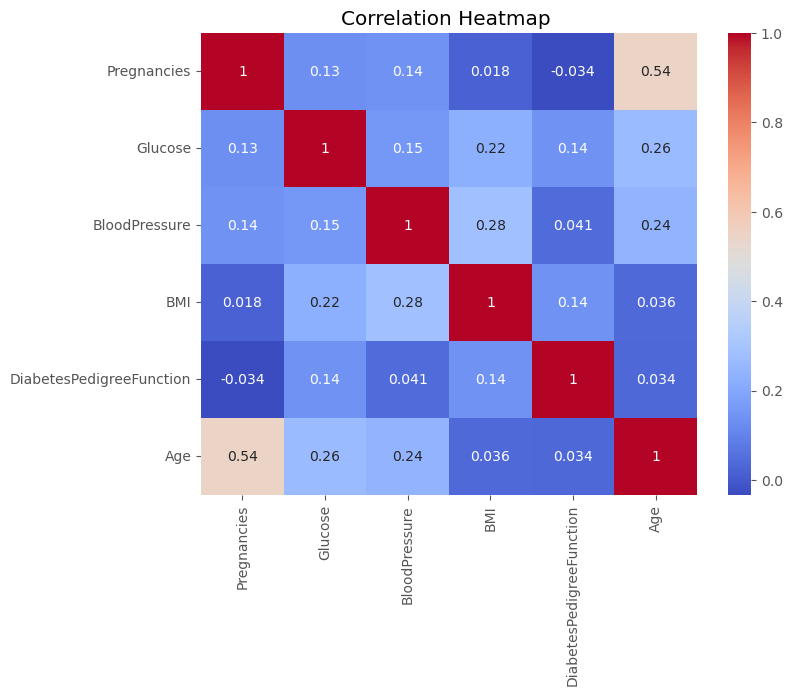

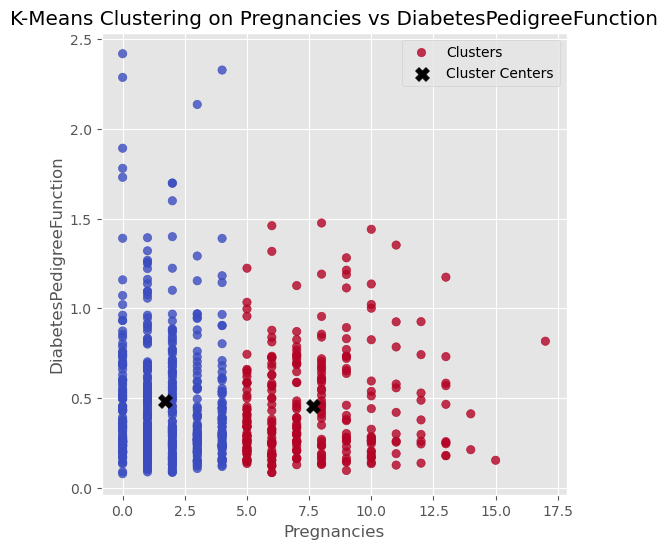

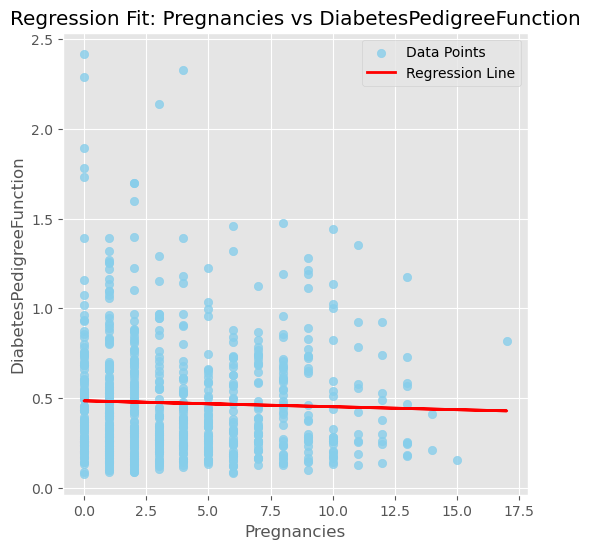

In [1900]:
plot_correlation_heatmap(df)

ELBOW PLOT: used to determine optimal number of clusters 

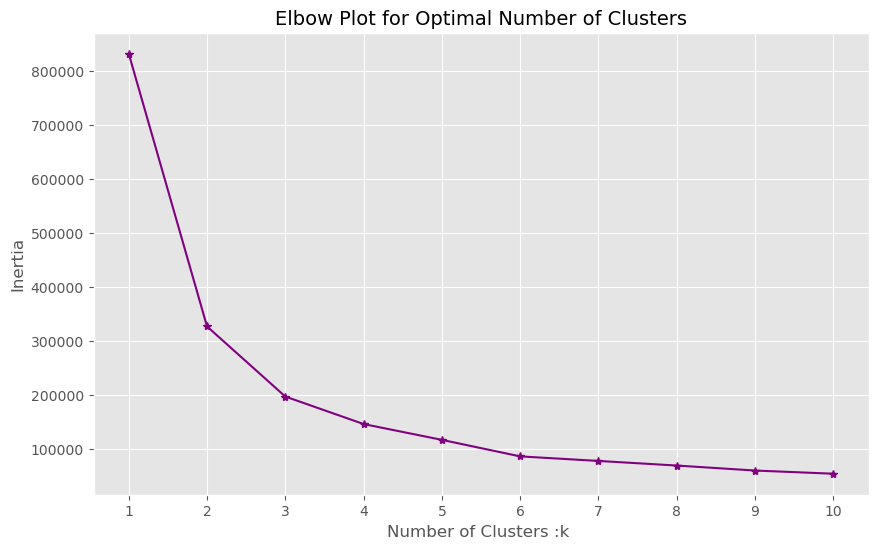

In [1901]:
    #plotting the Elbow plot
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia, marker='*', linestyle='-', color='purple')
    plt.title('Elbow Plot for Optimal Number of Clusters', fontsize=14)
    plt.xlabel('Number of Clusters :k ', fontsize=12)
    plt.ylabel('Inertia', fontsize=12)
    plt.xticks(k_values)
    plt.savefig("Elbow.png", dpi=400)
    plt.show()

In [1902]:
def elbow_clustering_fitting(df):
    """
    Includes plotting an elbow plot for optimal cluster number.
    Analyzes the clustering of 'Glucose' and 'BMI' using K-Means and fits 
    a linear regression model. 
    """
    # Calculating inertia  (Elbow Method)
    inertia = []
    k_values = range(1, 11)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    # K-Means Clustering with the optimal number of clusters 
    K = 3
    kmeans = KMeans(n_clusters=K, random_state=42)
    X['Cluster'] = kmeans.fit_predict(X)

    # Visualizing the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(
        X['Glucose'], X['BMI'], c=X['Cluster'], cmap='viridis', alpha=0.9, label='Clusters'
    )
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
        s=100, c='black', marker='X', label='Cluster Centers'
    )
    plt.title('K-Means Clustering of Glucose vs BMI', fontsize=14)
    plt.xlabel('Glucose', fontsize=12)
    plt.ylabel('BMI', fontsize=12)
    plt.legend()
    plt.savefig("elbowC.png", dpi=400)
    plt.show()

    # Linear Regression Fitting
    model = LinearRegression()
    X_fit = X['Glucose'].values.reshape(-1, 1)
    y_fit = X['BMI'].values
    model.fit(X_fit, y_fit)
    y_pred = model.predict(X_fit)

    # Scatter plot with regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(X['Glucose'], X['BMI'], alpha=0.8, label='Data Points',color='purple')
    plt.plot(X['Glucose'], y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title('Regression Fitting Glucose vs BMI', fontsize=14)
    plt.xlabel('Glucose', fontsize=12)
    plt.ylabel('BMI',fontsize=12)
    plt.legend()
    plt.savefig("elbowF.png", dpi=400)
    plt.show()


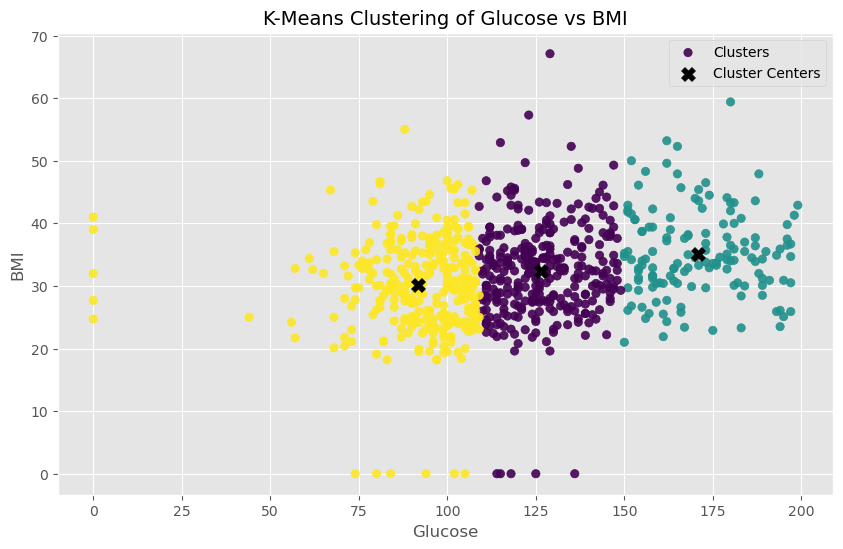

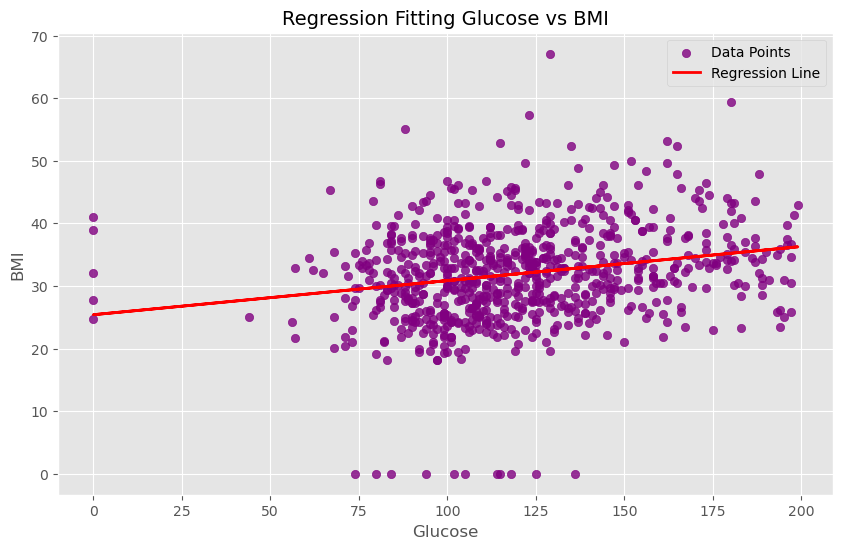

In [1903]:
elbow_clustering_fitting(df)

SILHOUETTE PLOT : for understanding how well clusters separates from other cluster group.

In [1904]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression

def silhouette_clustering_fitting(df):
    """
    Analyzes the clustering of 'Glucose' and 'BMI' using K-Means and 
    visualizes the silhouette graph, clustering results, and regression fit.
    """
    # Generate Silhouette Graph
    k_values = range(2, 11)
    silhouette_scores = []

    plt.figure(figsize=(10, 6))
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores
    plt.plot(
        k_values, silhouette_scores, marker='o', linestyle='-', color='blue',
        label='Silhouette Score'
    )
    plt.title('Silhouette Score for Different Cluster Numbers', fontsize=14)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()
    plt.savefig("Silhouette.png", dpi=400)
    plt.show()

    # Optimal clustering 
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    X['Cluster'] = kmeans.fit_predict(X)

    # Scatter plot for clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(
        X['Glucose'], X['BMI'], c=X['Cluster'], cmap='Oranges', alpha=0.7,
        label='Clusters'
    )
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        s=100, c='black', marker='X', label='Cluster Centers'
    )
    plt.title('K-Means Clustering: Glucose vs BMI', fontsize=14)
    plt.xlabel('Glucose', fontsize=12)
    plt.ylabel('BMI', fontsize=12)
    plt.legend()
    plt.savefig("Silhouette_C.png", dpi=144)
    plt.show()

    # Fitting
    model = LinearRegression()
    X_fit = X['Glucose'].values.reshape(-1, 1)#independent
    y_fit = X['BMI'].values #dependent
    model.fit(X_fit, y_fit)
    y_pred = model.predict(X_fit)

    # Scatter plot with regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X['Glucose'], X['BMI'], alpha=0.8, label='Data Points',color='orange')
    plt.plot(X['Glucose'], y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title('Regression Fit: Glucose vs BMI', fontsize=14)
    plt.xlabel('Glucose', fontsize=12)
    plt.ylabel('BMI', fontsize=12)
    plt.legend()
    plt.savefig("Silhouette_F.png", dpi=144)
    plt.show()



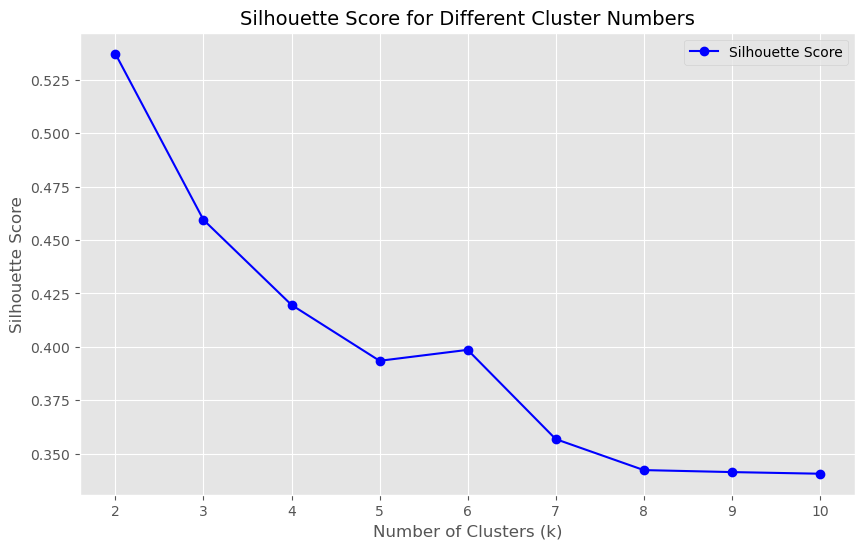

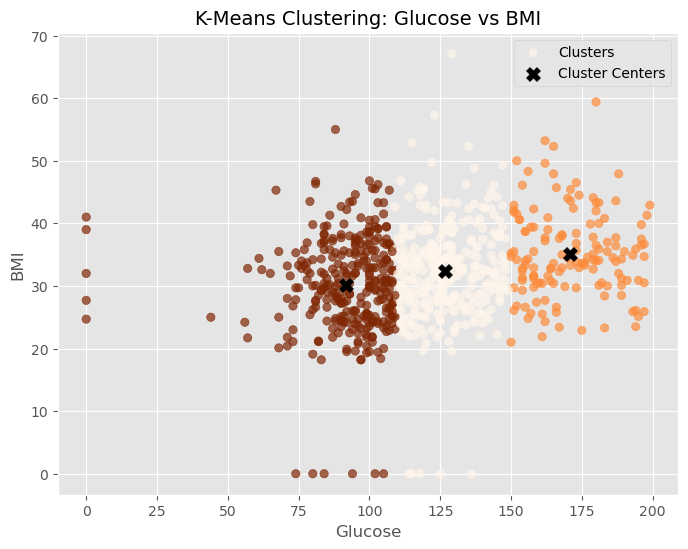

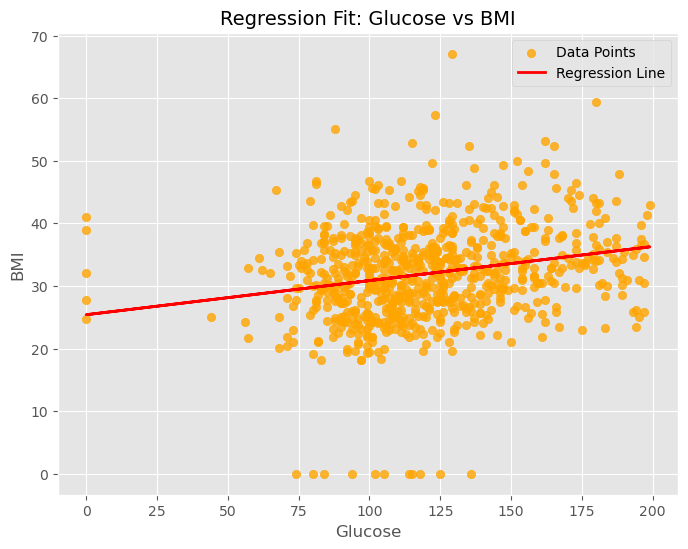

In [1905]:
silhouette_clustering_fitting(df)